In [1]:
## Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Churn_data.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
## Check duplicate customers

print("Unique customer Ids:",len(df.CustomerId.unique()))

Unique customer Ids: 10000


In [8]:
## Drop useless features

df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
## Check missing values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
## number of categories of categorical features

print("Geography:\n", df.Geography.value_counts())
print("\nGender:\n", df.Gender.value_counts())

Geography:
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender:
 Male      5457
Female    4543
Name: Gender, dtype: int64


In [11]:
## Get dummies Geography

geo_dummies = pd.get_dummies(df.Geography, drop_first=True)

In [12]:
print(geo_dummies.head())

   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1


In [13]:
df = pd.concat([geo_dummies, df], axis=1)

In [14]:
df.head()

,Germany,Spain,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.drop(labels='Geography', axis=1, inplace=True)

In [16]:
df.head()

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
## Gender label Encoding

df['Gender'].replace({"Male": 1, "Female": 0}, inplace=True)

In [18]:
df.head()

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0,1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0,1,850,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
## Gender unique
print("Gender: \n", df.Gender.unique())
print(df.Gender.value_counts())

Gender: 
 [0 1]
1    5457
0    4543
Name: Gender, dtype: int64


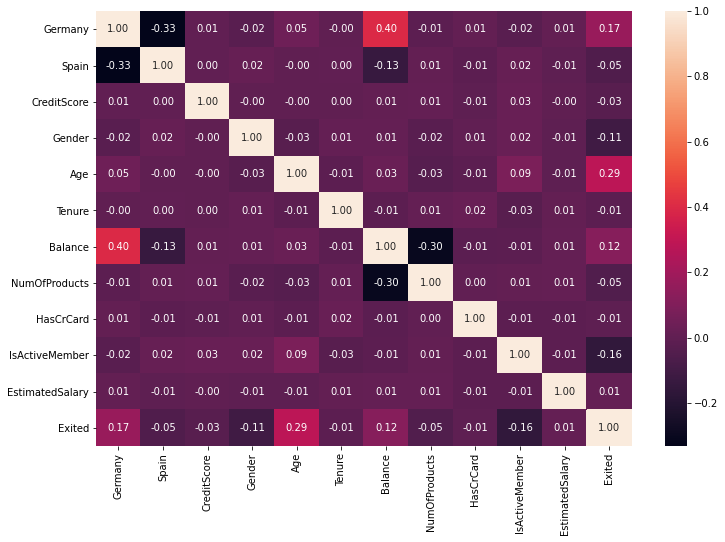

In [20]:
## Correlation
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f')
plt.show()

Text(0.5, 1.0, 'Churn Rate')

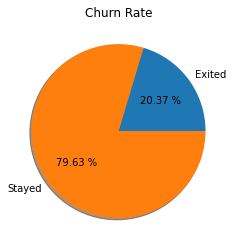

In [21]:
plt.pie(x=[len(df[df.Exited == 1]), len(df[df.Exited == 0])], labels=['Exited', 'Stayed'], shadow=True, autopct='%.2f %%')
plt.title("Churn Rate")

Text(0.5, 1.0, 'Existed Male vs Female')

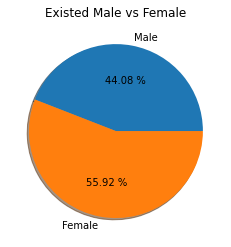

In [22]:
plt.pie(x=[len(df[(df.Exited == 1) & (df.Gender==1)]), len(df[(df.Exited == 1) & (df.Gender == 0)])], 
        labels=['Male', 'Female'], shadow=True, autopct='%.2f %%')
plt.title("Existed Male vs Female")

Text(0.5, 1.0, 'Existed Active vs Inactive')

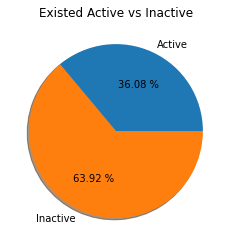

In [23]:
plt.pie(x=[len(df[(df.Exited == 1) & (df.IsActiveMember==1)]), len(df[(df.Exited == 1) & (df.IsActiveMember == 0)])], 
        labels=['Active', 'Inactive'], shadow=True, autopct='%.2f %%')
plt.title("Existed Active vs Inactive")

In [24]:
print(df[df.Exited == 1]['Age'].mode()[0])
print(df[df.Exited == 0]['Age'].mode()[0])

46
35


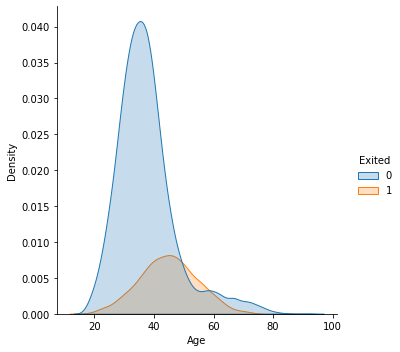

In [25]:
sns.displot(data=df, x='Age', hue='Exited', kind='kde', fill=True)

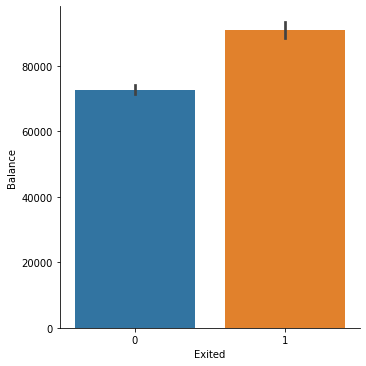

In [26]:
sns.catplot(data=df, x='Exited', y='Balance', kind='bar')

In [27]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [28]:
## Product 1 churn analysis

p1_num = df[df.NumOfProducts == 1]
print("p1 count: ", len(p1_num))

exited_p1 = df[(df.NumOfProducts == 1) & (df.Exited == 1)]
print("Exited p1 count: ", len(exited_p1))

percent_exited_p1 = len(exited_p1) * 100/len(p1_num)
print("Percentage of exited p1: ", percent_exited_p1)

p1 count:  5084
Exited p1 count:  1409
Percentage of exited p1:  27.714398111723053


In [29]:
## Product 2 churn analysis

p2_num = df[df.NumOfProducts == 2]
print("p2 count: ", len(p2_num))

exited_p2 = df[(df.NumOfProducts == 2) & (df.Exited == 1)]
print("Exited p2 count: ", len(exited_p2))

percent_exited_p2 = len(exited_p2) * 100/len(p2_num)
print("Percentage of exited p2: ", percent_exited_p2)

p2 count:  4590
Exited p2 count:  348
Percentage of exited p2:  7.5816993464052285


In [30]:
## Product 3 churn analysis

p3_num = df[df.NumOfProducts == 3]
print("p3 count: ", len(p3_num))

exited_p3 = df[(df.NumOfProducts == 3) & (df.Exited == 1)]
print("Exited p3 count: ", len(exited_p3))

percent_exited_p3 = len(exited_p3) * 100/len(p3_num)
print("Percentage of exited p3: ", percent_exited_p3)

p3 count:  266
Exited p3 count:  220
Percentage of exited p3:  82.70676691729324


In [31]:
## Product 4 churn analysis

p4_num = df[df.NumOfProducts == 4]
print("p4 count: ", len(p4_num))

exited_p4 = df[(df.NumOfProducts == 4) & (df.Exited == 1)]
print("Exited p4 count: ", len(exited_p4))

percent_exited_p4 = len(exited_p4) * 100/len(p4_num)
print("Percentage of exited p4: ", percent_exited_p4)

p4 count:  60
Exited p4 count:  60
Percentage of exited p4:  100.0


In [32]:
## Train test split 
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [34]:
## Standard Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train[1,:]

array([ 1.72572313, -0.57638802, -0.20389777,  0.91324755,  0.29493847,
       -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,  0.97481699,
        1.6612541 ])

In [36]:
X_test[1,:]

array([-0.57946723, -0.57638802, -0.29729735,  0.91324755,  0.3900109 ,
       -1.38944225, -1.21847056,  0.80843615,  0.64920267,  0.97481699,
        0.79888291])

In [37]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [38]:
## SMOTE (Synthesis minoriy Over-sampling Technique)
from imblearn.over_sampling import SMOTE

In [39]:
oversample = SMOTE(random_state=42, k_neighbors=5)
X_train_resample, y_train_resample = oversample.fit_resample(X_train, y_train)

In [40]:
X_train_resample.shape

(12712, 11)

In [43]:
y_train_resample.shape

(12712,)

In [45]:
y_train_resample.value_counts()

1    6356
0    6356
Name: Exited, dtype: int64

In [48]:
## Logistic regression

from sklearn.linear_model import LogisticRegression

## On imbalance data set without oversampling
lr_org = LogisticRegression()
lr_org.fit(X_train, y_train)
lr_org_pred = lr_org.predict(X_test)

## On ovarsampled dataset
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train_resample, y_train_resample)
lr_ovr_pred = lr_ovr.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, lr_org_pred))
print(classification_report(y_test, lr_ovr_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



In [49]:
## precision is important in this usecase of churn so oversampling it giving 91% precision and 
## without oversampling i.e on imbalance dataset precision is 83%

In [58]:
from sklearn.metrics import precision_score, accuracy_score

lr_acc = accuracy_score(y_test, lr_ovr_pred)
lr_pr = precision_score(y_test, lr_ovr_pred, average=None)[0]
print("Log reg accuracy: {:.2f}".format(lr_acc))
print("Log reg precision: {:.2f}".format(lr_pr))

Log reg accuracy: 0.72
Log reg precision: 0.91


In [59]:
## KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_resample, y_train_resample)
knn_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_pr = precision_score(y_test, knn_pred, average=None)[0]

print("KNN accuracy: {:.2f}".format(knn_acc))
print("KNN precision: {:.2f}".format(knn_pr))

KNN accuracy: 0.74
KNN precision: 0.90


In [61]:
## Gaussian NB

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_resample, y_train_resample)
gnb_pred = gnb.predict(X_test)

gnb_acc = accuracy_score(y_test, gnb_pred)
gnb_pr = precision_score(y_test, gnb_pred, average=None)[0]

print("Gaussian NB accuracy: {:.2f}".format(gnb_acc))
print("Gaussian NB precision: {:.2f}".format(gnb_pr))

Gaussian NB accuracy: 0.73
Gaussian NB precision: 0.91


Best accuracy = 0.809 in k=81


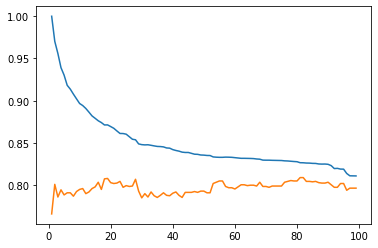

In [63]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

best_acc = 0
best_k = 0
train_acc_lst = []
test_acc_lst = []

for k in range(1, 100):
    dt = DecisionTreeClassifier(min_samples_leaf=k)
    dt.fit(X_train_resample, y_train_resample)
    temp_acc = accuracy_score(y_test, dt.predict(X_test))
    test_acc_lst.append(temp_acc)
    
    train_acc_lst.append(accuracy_score(y_train_resample, dt.predict(X_train_resample)))
    
    if temp_acc > best_acc:
        best_acc = temp_acc
        best_k = k

print("Best accuracy = {} in k={}".format(best_acc, best_k))

plt.plot(np.arange(1, 100), train_acc_lst)
plt.plot(np.arange(1,100), test_acc_lst)

In [67]:
dt = DecisionTreeClassifier(min_samples_leaf=80)
dt.fit(X_train_resample, y_train_resample)
dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_pr = precision_score(y_test, dt_pred, average=None)[0]

print("Decision tree accuracy: {:.2f}".format(dt_acc))
print("Decision tree precision: {:.2f}".format(dt_pr))

Decision tree accuracy: 0.81
Decision tree precision: 0.92


In [68]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train_resample, y_train_resample)
rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_pr = precision_score(y_test, rf_pred, average=None)[0]

print("Random forest accuracy: {:.2f}".format(rf_acc))
print("Random forest precision: {:.2f}".format(rf_pr))

Random forest accuracy: 0.82
Random forest precision: 0.92


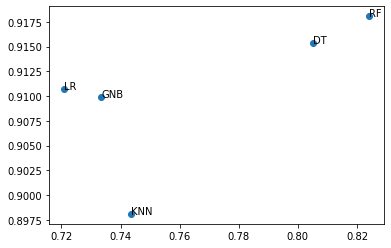

In [70]:
## model comparison

labels = ["LR", "KNN", "GNB", "DT", "RF"]
x = [lr_acc, knn_acc, gnb_acc, dt_acc, rf_acc]
y = [lr_pr, knn_pr, gnb_pr, dt_pr, rf_pr]

plt.scatter(x,y)
for i in range(len(labels)):
    plt.annotate(labels[i], (x[i],y[i]))

In [73]:
eval_df = pd.DataFrame()
eval_df['Model'] = labels
eval_df['Accuracy'] = x
eval_df['Precision'] = y

print(eval_df.sort_values("Accuracy", ascending=False))

  Model  Accuracy  Precision
4    RF    0.8240   0.918055
3    DT    0.8050   0.915358
1   KNN    0.7435   0.898108
2   GNB    0.7335   0.909924
0    LR    0.7210   0.910728


<AxesSubplot:>

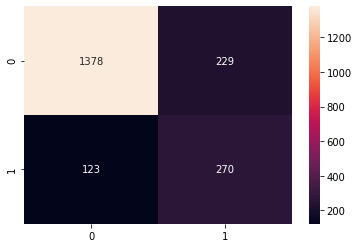

In [75]:
## Random forest eval

from sklearn.metrics import confusion_matrix

rf_cn = confusion_matrix(y_test, rf_pred)

sns.heatmap(rf_cn, annot=True, fmt=".0f")

In [76]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1607
           1       0.54      0.69      0.61       393

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000

